# A1.5 Solución de problemas
## Luis Enrique Garcia Gallegos
### **Matricula**: 649247
Para esta actividad trabajaremos con la base de datos de calificaciones que utilizamos en la lectura interactiva `L1.1 Aprendizaje estadístico-automático`. Nos interesa tratar de predecir la calificación final de estudiantes de un curso, a partir de su información demográfica y sus calificaciones de los primeros dos periodos. 
Utilizaremos el archivo de nombre `Calificaciones.csv`, donde podrás encontrar información para **395 estudiantes**, con **10 variables** en total. Los datos se descargaron del Student Performance Data Set en el __[UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/320/student+performance)__, y podrás encontrar más información sobre los mismos en el siguiente __[enlace](http://www3.dsi.uminho.pt/pcortez/student.pdf)__.

La base de datos cuenta con la siguiente información: 
* `Escuela`. Indica si el estudiante en cuestión asistía a la escuela *Gabriel Pereira* **GP** o a la escuela *Mousinho da Silveira* **MS**.
* `Sexo`. **F** para mujeres y **H** para hombres. 
* `Edad`. Edad del estudiante, en **años**. 
* `HorasDeEstudio`. Cantidad de horas de estudio: **1** indica menos de dos horas, **2** indica de dos a cinco horas, **3** indica de cinco a diez horas, **4** indica más de diez horas. 
* `Reprobadas`. Indica la cantidad de materias reprobadas previamente. 
* `Internet`. Si el estudiante tenía acceso **yes** o no **no** a internet en su casa. 
* `Faltas`. Cantidad de veces que faltó a clases. 
* `G1`. Calificación del primer periodo, escala del **0** al **20**. 
* `G2`. Calificación del segundo periodo, escala del **0** al **20**. 
* `G3`. Calificación final, escala del **0** al **20**. 

Desarrolla los siguientes puntos en una *Jupyter Notebook*, tratando, dentro de lo posible, que cada punto se trabaje en una celda distinta. Los comentarios en el código siempre son bienvenidos, de preferencia, aprovecha el *markdown* para generar cuadros de descripción que ayuden al lector a comprender el trabajo realizado. 
1. Importa los datos del archivo `Calificaciones.csv` a tu ambiente de trabajo. Este archivo lo encontrarás en la misma página donde descargaste esta plantilla. Imprime en consola el tipo de dato de cada variable del *data frame*. 

In [1]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
from seaborn import heatmap
random.seed(0)
datos=ps.read_csv("Calificaciones.csv")
print("Variables:\n\t", datos.columns)

Variables:
	 Index(['Escuela', 'Sexo', 'Edad', 'HorasDeEstudio', 'Reprobadas', 'Internet',
       'Faltas', 'G1', 'G2', 'G3'],
      dtype='object')


Se decidió usar una semilla para evitar tener aleatoriedad en nuestros datos.

2. Transforma todas las variables categóricas, de forma que los nuevos datos sean útiles para generar un modelo de regresión lineal múltiple. Presta especial atención a variables que, aunque parecen cuantitativas (contienen números), realmente son cualitativas (los números representan una clase). Imprime **las primeras 5 observaciones** de la base de datos modificada, demostrando que las variables cualitativas desaparecieron y fueron reemplazadas por variables adecuadas.

In [2]:
for columnas in ['Escuela', 'Sexo', 'Internet']:
    insert_loc=datos.columns.get_loc(columnas)
    datos=ps.concat([datos.iloc[:,:insert_loc], ps.get_dummies(datos.loc[:, [columnas]]), datos.iloc[:,insert_loc+1:]], axis=1)
datos['Horas4']=datos['HorasDeEstudio']//4
datos['Horas3']=(datos['HorasDeEstudio']//3)-datos['Horas4']
datos['Horas2']=(datos['HorasDeEstudio']//2)-datos['Horas3']-(2*datos['Horas4'])
datos=datos.drop(columns=['Internet_no', 'Escuela_MS', 'Sexo_M', 'HorasDeEstudio'])
datos=datos.astype({'Escuela_GP': 'int8', 'Sexo_F': 'int8', 'Internet_yes': 'int8'})
datos.head(5)

,Escuela_GP,Sexo_F,Edad,Reprobadas,Internet_yes,Faltas,G1,G2,G3,Horas4,Horas3,Horas2
0,1,1,18,0,0,6,5,6,6,0,0,1
1,1,1,17,0,1,4,5,5,6,0,0,1
2,1,1,15,3,1,10,7,8,10,0,0,1
3,1,1,15,0,1,2,15,14,15,0,1,0
4,1,1,16,0,0,4,6,10,10,0,0,1


Se convirtió las variables que tuvieran algo distinto de números a booleanos, por ejemplo en `Escuela`, se crearían **2 columnas** siendo `Escuela_GP` y `Escuela_MS` los cuales contendrían **False** o **True**, por lo que si las comparáramos veríamos que una es lo opuesto de la otra por lo que lo mejor seria eliminar una de las dos. De ahi deberemos pasar de booleano a entero, para poder usarlos en un modelo lineal multiple. Para poder hacer eso con horas de estudio se tuvo que crear columnas en la cuales pudiéramos pasar cada numero a **0** y **1**, pero para eso tendremos que pasar el numero desdado a **1** y lo demás a **0**, eso no se hizo con el **1** porque seria innecesario.

3. Identifica valores atípicos para la variable `Faltas`, utilizando el ***método de Tukey*** con `k=3`. Imprime en consola todas las observaciones que se consideren atípicas, y tras revisar las características de dichas observaciones, agrega una línea de texto que describa qué planeas hacer con dichos valores y por qué. Realiza la acción descrita en caso de ser necesario.

In [3]:
q1=datos.Faltas.quantile(0.25)
q3=datos.Faltas.quantile(0.75)
riq=q3-q1
limA=q1-(3*riq)
limB=q3+(3*riq)
atipico=datos[(datos.Faltas<limA)|(datos.Faltas>limB)]
print(q1, "-", (3*riq), "<",np.median(datos.Faltas), "<", q3, "+", (3*riq))
print("\nDimensiones de los datos: ",datos.shape)
print("\nValores atípicos")
print(datos[datos.Faltas>(q3+(3*riq))])
datos=datos[datos.Faltas<=(q3+(3*riq))]
print("\nDimensiones de los datos: ",datos.shape)
print(datos[datos.Faltas>(q3+(3*riq))])

0.0 - 24.0 < 4.0 < 8.0 + 24.0

Dimensiones de los datos:  (395, 12)

Valores atípicos
     Escuela_GP  Sexo_F  Edad  Reprobadas  Internet_yes  Faltas  G1  G2  G3  \
74            1       1    16           0             1      54  11  12  11   
183           1       1    17           0             1      56   9   9   8   
276           1       1    18           0             1      75  10   9   9   
307           1       0    19           1             1      38   8   9   8   
315           1       1    19           1             1      40  13  11  11   

     Horas4  Horas3  Horas2  
74        0       0       1  
183       0       0       1  
276       0       0       1  
307       0       0       0  
315       0       1       0  

Dimensiones de los datos:  (390, 12)
Empty DataFrame
Columns: [Escuela_GP, Sexo_F, Edad, Reprobadas, Internet_yes, Faltas, G1, G2, G3, Horas4, Horas3, Horas2]
Index: []


El **método de Tukey** nos permite conocer si un valor esta fuera de lo común, en nuestro caso para `Faltas` nuestro intervalo seria de **-24** a **32**, no obstante como sabemos el contexto de nuestros datos sabemos que no se puede tener faltas negativas por lo que solamente se considerara el intervalo de **0** a **32** como lo normal, los valores fuera de este intervalo serán borrados, esto no quiere decir que se borren porque no es posible tener **más de 32 faltas**, sino porque son muy pocos los casos por lo que al entrenar nuestro modelo esto podría traer malas aproximaciones.

4. Genera una matriz de correlaciones para encontrar potenciales problemas de colinealidad. Genera un ***heatmap*** para visualizar de forma más sencilla los resultados. Determina si es necesario eliminar una o múltiples variables, explicando tu razonamiento en una línea de texto. Realiza la acción descrita en caso de ser necesario.

<Axes: >

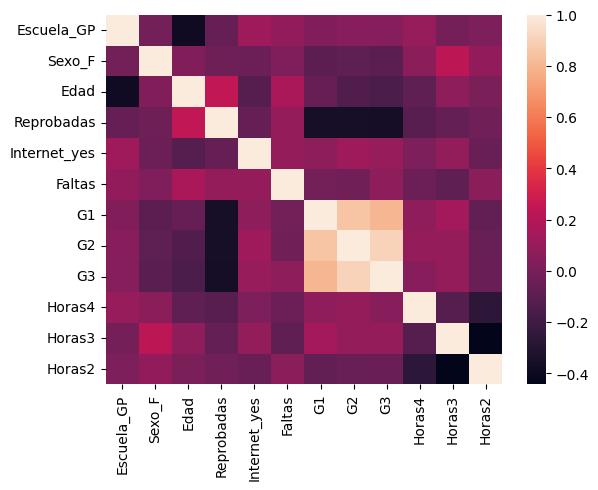

In [4]:
correlaciones=datos.corr()
heatmap(correlaciones)

Con este ***heatmap*** podemos visualizar de mejor manera las correlaciones de nuestra variables, algo importante a destacar es que entre más cerca de **1** es una buena correlación, no obstante tenemos valores negativos, los cuales pueden tener una buena correlación por lo que debemos tener cuidado de pensar que si es negativo es una variable que no tiene correlación.

5. Incluye términos de interacción para al **menos dos pares de variables**, las que te llame más la atención analizar con esta metodología. Trata de evitar incluir interacciones para todos los pares de variables posibles. Imprime en consola **las primeras 5 observaciones** de la base de datos con los nuevos términos.

In [5]:
limpio = datos[correlaciones['G3'].abs()[correlaciones['G3'].abs()>0.1].index.tolist()]
limpio.head(5)

,Sexo_F,Edad,Reprobadas,G1,G2,G3
0,1,18,0,5,6,6
1,1,17,0,5,5,6
2,1,15,3,7,8,10
3,1,15,0,15,14,15
4,1,16,0,6,10,10


Como se menciono antes el negativo no implica que no estén correlación, por lo que se debe tomar el valor absoluto mediante `abs()` y conservar las variables que tengan un numero mayor a **0.1**, esto fue un valor que escogí yo para poder considerar un buen numero de variables y no solamente enfocarme en 2 variables de las que hay.

6. Entrena un modelo de regresión lineal múltiple en un subconjunto de datos que corresponda al **80%** de los datos totales e imprime en consola un resumen de los resultados obtenidos. Posteriormente, usando dicho modelo, predice la calificación final del **20%** de las observaciones que no se usaron para entrenar. Genera una **gráfica de dispersión** de las calificaciones finales reales contra las calificaciones finales estimadas por el modelo en los datos de prueba. Agrega una línea de texto donde des una conclusión sobre los resultados del modelo, con base en la información que se muestra en la gráfica.

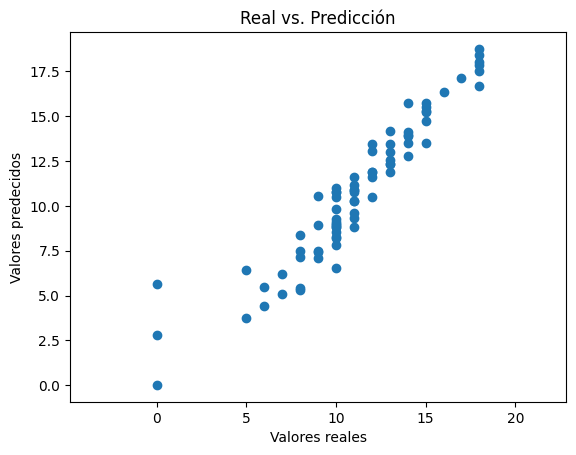

In [6]:
caliz=limpio.sample(frac=0.8)
prueba=limpio.drop(caliz.index)
XC=caliz.drop('G3', axis=1)
YC=caliz.G3
XP=prueba.drop('G3', axis=1)
YP=prueba.G3
modelo=sm.OLS(YC, sm.add_constant(XC))
resultados=modelo.fit()
estimacion=resultados.predict(sm.add_constant(XP))
plt.scatter(YP, estimacion)
plt.title('Real vs. Predicción')
plt.xlabel("Valores reales")
plt.ylabel("Valores predecidos")
plt.axis('equal')
plt.show()

Como se puede ver en la gráfica tuvimos una buena aproximación, no obstante hubo ciertos casos donde no hubo una buena aproximación.

**Firma de Honor:** Doy mi palabra que he realizado esta actividad con integridad académica